In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, roc_curve, roc_auc_score

In [2]:
# Selecting the dataset
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(return_X_y=True, as_frame=True)
list(load_breast_cancer().keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [3]:
# Dataset DESCRIPTION
print(load_breast_cancer()['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
# Features
X.iloc[:,:10]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [5]:
meanData = X.iloc[:, :10]
meanData = pd.concat([meanData, y], axis=1)
newNames = ['Raio médio', 'Textura média', 'Perímetro médio', 'Área média', 'Maciez média', 'Compactação média', 'Concavidade média', 'Média dos pontos côncavos','Simetria média', 'Dimensão fractal média', 'Diagnóstico']
meanData.columns = newNames
meanData

,Raio médio,Textura média,Perímetro médio,Área média,Maciez média,Compactação média,Concavidade média,Média dos pontos côncavos,Simetria média,Dimensão fractal média,Diagnóstico
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0
...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0


<Axes: >

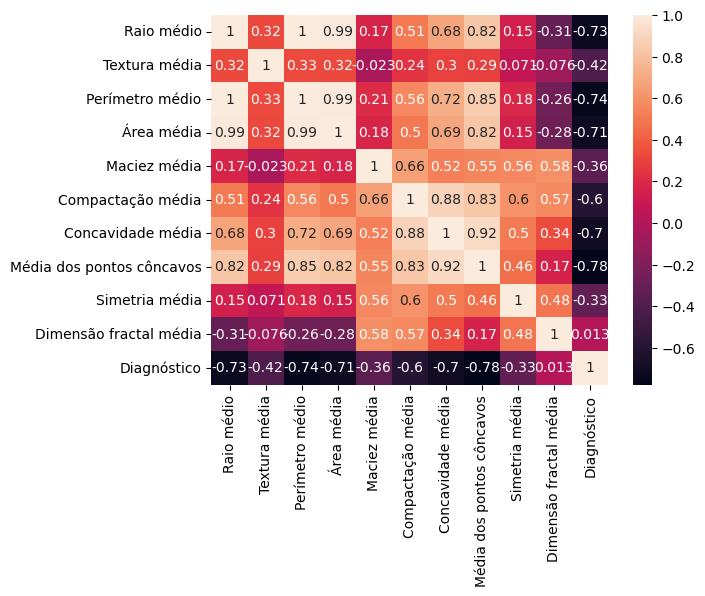

In [6]:
sns.heatmap(meanData.corr(), annot=True)      # Heap map to look to the correlation between the data.

In [7]:
# Selection the features tat has more than 0.7 of corretation.
data = meanData[['Raio médio', 'Perímetro médio', 'Área média', 'Concavidade média', 'Média dos pontos côncavos']]

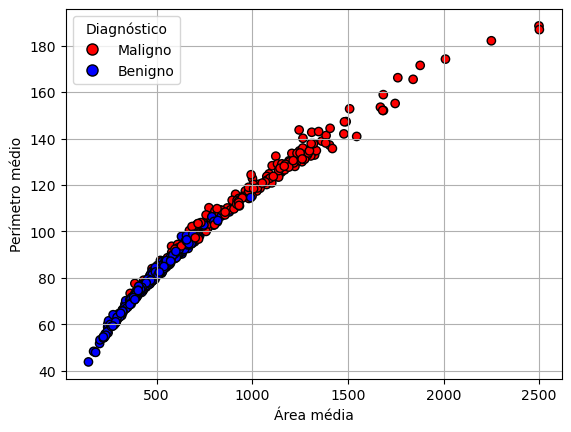

In [8]:
plt.scatter(meanData['Área média'], meanData['Perímetro médio'], c=-meanData['Diagnóstico'], edgecolors='black', cmap='bwr', alpha=1)

# Legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=label, 
                               markerfacecolor=color, markersize=8, markeredgecolor='black') 
                   for color, label in [('r', 'Maligno'), ('b', 'Benigno')]]

plt.legend(handles=legend_elements, title='Diagnóstico')
plt.xlabel("Área média")
plt.ylabel("Perímetro médio")
plt.grid()

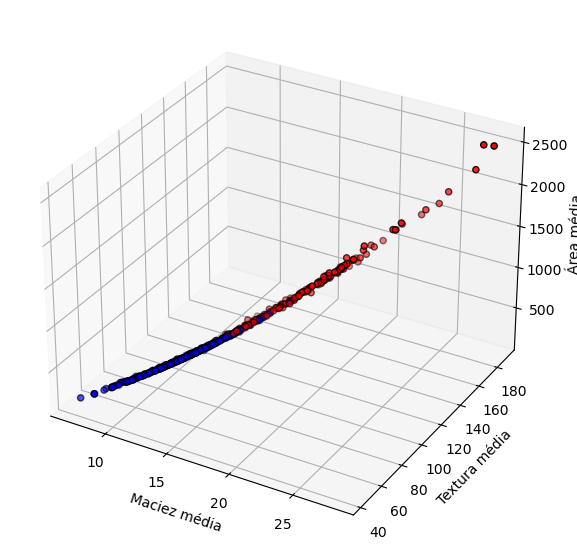

In [9]:
from mpl_toolkits import mplot3d

# Creating figure
fig = plt.figure(figsize = (8, 7))
ax = plt.axes(projection ="3d")


ax.scatter(data['Raio médio'], data['Perímetro médio'], data['Área média'], c=-y, cmap='bwr', edgecolors='black')
ax.set_xlabel('Maciez média')
ax.set_ylabel('Textura média')
ax.set_zlabel('Área média')

# show plot
plt.show()

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
# Separating the features from target.
meanData = meanData.iloc[:, :10]

In [12]:
# Selecting the training set and validation set.
xTrain, xTest, yTrain, yTest = train_test_split(data, y, test_size=0.2, random_state=8)

In [13]:
# Model
logReg = LogisticRegression()
logReg.fit(xTrain, yTrain)

# Hiperplane
print('h(x1,x2,...,x5) = %2.2f + %2.2f x_1 + %2.2f x_2 + %2.2f x_3 + %2.2f x_4 + %2.2f x_5 ' % (logReg.intercept_, logReg.coef_.flatten()[0], logReg.coef_.flatten()[1], logReg.coef_.flatten()[2], logReg.coef_.flatten()[3], logReg.coef_.flatten()[4]))

h(x1,x2,...,x5) = 18.01 + 2.65 x_1 + -0.64 x_2 + 0.01 x_3 + -1.20 x_4 + -0.69 x_5 


In [14]:
data

,Raio médio,Perímetro médio,Área média,Concavidade média,Média dos pontos côncavos
0,17.99,122.80,1001.0,0.30010,0.14710
1,20.57,132.90,1326.0,0.08690,0.07017
2,19.69,130.00,1203.0,0.19740,0.12790
3,11.42,77.58,386.1,0.24140,0.10520
4,20.29,135.10,1297.0,0.19800,0.10430
...,...,...,...,...,...
564,21.56,142.00,1479.0,0.24390,0.13890
565,20.13,131.20,1261.0,0.14400,0.09791
566,16.60,108.30,858.1,0.09251,0.05302
567,20.60,140.10,1265.0,0.35140,0.15200


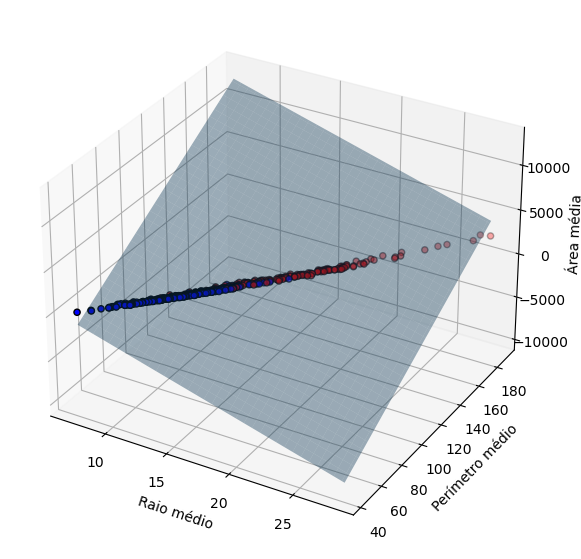

In [15]:
from mpl_toolkits import mplot3d


# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

# Figure based on the article
ax.scatter(xTrain['Raio médio'], xTrain['Perímetro médio'], xTrain['Área média'], c=-yTrain, cmap='bwr', edgecolors='black')
ax.set_xlabel('Raio médio')
ax.set_ylabel('Perímetro médio')
ax.set_zlabel('Área média')

xx = np.linspace(xTrain['Raio médio'].min(), xTrain['Raio médio'].max(), num=101)
yy = np.linspace(xTrain['Perímetro médio'].min(), xTrain['Perímetro médio'].max(), num=101)
xx, yy = np.meshgrid(xx, yy)

def z(x, y):
    return -(logReg.intercept_[0] + logReg.coef_[0][0] * x + logReg.coef_[0][1] * y)/(logReg.coef_[0][2])

# z = lambda x, y: (logReg.intercept_[0] + logReg.coef_[0][4] * x + logReg.coef_[0][1] * y)

ax.plot_surface(xx, yy, z(xx, yy), alpha=0.4)

# show plot
plt.show()

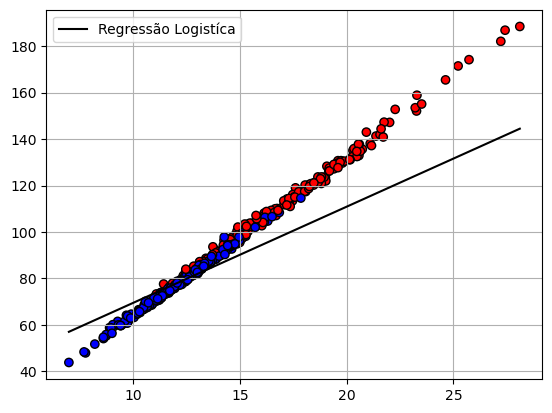

In [16]:

plt.scatter(xTrain['Raio médio'], xTrain['Perímetro médio'], c=-yTrain, cmap='bwr', edgecolors='black')

xx = np.linspace(xTrain['Raio médio'].min(), xTrain['Raio médio'].max(), num=101)

def f(x):
    return -(logReg.intercept_[0] + logReg.coef_[0][0] * x)/logReg.coef_[0][1]

plt.plot(xx, f(xx), color='black', label='Regressão Logistíca')
plt.legend()
plt.grid()
plt.show()

In [17]:
predictValue = logReg.predict(xTrain)
trainingData = accuracy_score(yTrain, predictValue)
trainingData

0.9032967032967033

In [18]:
print('Matriz de confusão no conjunto de treinamento:\n',
confusion_matrix(yTrain, logReg.predict(xTrain)))
print('Matriz de confusão no conjunto de validação:\n', 
confusion_matrix(yTest, logReg.predict(xTest)))

Matriz de confusão no conjunto de treinamento:
 [[137  29]
 [ 15 274]]
Matriz de confusão no conjunto de validação:
 [[38  8]
 [ 4 64]]


In [19]:
print('Precisão no conjunto de treinamento: %2.3f' % precision_score(yTrain, logReg.predict(xTrain)))
print('Precisão no conjunto de validação: %2.3f' % precision_score(yTest, logReg.predict(xTest)))

Precisão no conjunto de treinamento: 0.904
Precisão no conjunto de validação: 0.889


In [20]:
print('Recall no conjunto de treinamento: %2.3f' % recall_score(yTrain, logReg.predict(xTrain)))
print('Recall no conjunto de validação: %2.3f' % recall_score(yTest, logReg.predict(xTest)))

Recall no conjunto de treinamento: 0.948
Recall no conjunto de validação: 0.941


In [21]:
print('f1 score no conjunto de treinamento: %2.3f' % f1_score(yTrain, logReg.predict(xTrain)))
print('f1 score no conjunto de validação: %2.3f' % f1_score(yTest, logReg.predict(xTest)))

f1 score no conjunto de treinamento: 0.926
f1 score no conjunto de validação: 0.914


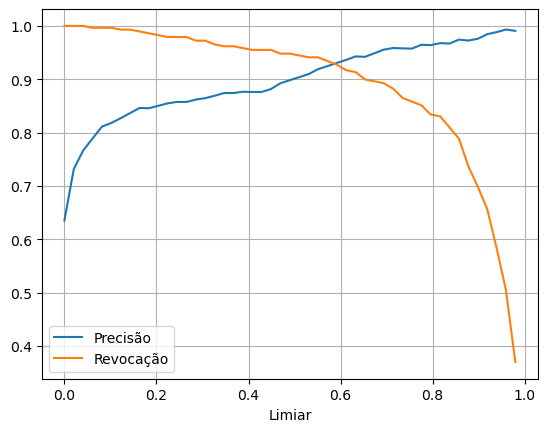

In [22]:
t = np.linspace(0, 1)
Precision_training =[]
Recall_training = []

f_training = 1/(1 + np.exp(-logReg.decision_function(xTrain)))

for i in t[:-1]:
    Precision_training.append(precision_score(yTrain, f_training>=i))
    Recall_training.append(recall_score(yTrain, f_training>=i))

plt.plot(t[:-1], Precision_training, label='Precisão')
plt.plot(t[:-1], Recall_training, label='Revocação')
plt.xlabel('Limiar')
plt.legend()
plt.grid()
plt.show()

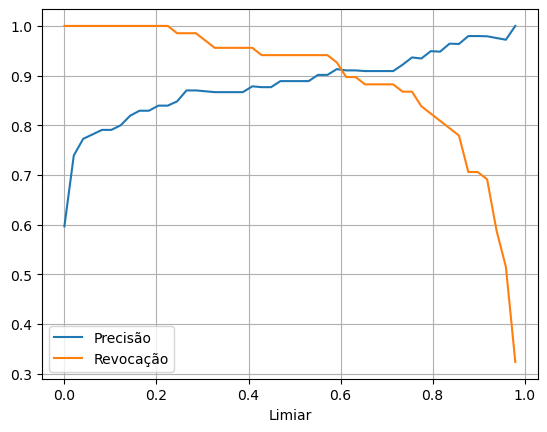

In [23]:
t = np.linspace(0, 1)
Precision_test =[]
Recall_test = []

f_test = 1/(1 + np.exp(-logReg.decision_function(xTest)))

for i in t[:-1]:
    Precision_test.append(precision_score(yTest, f_test>=i))
    Recall_test.append(recall_score(yTest, f_test>=i))

plt.plot(t[:-1], Precision_test, label='Precisão')
plt.plot(t[:-1], Recall_test, label='Revocação')
plt.xlabel('Limiar')
plt.legend()
plt.grid()
plt.show()

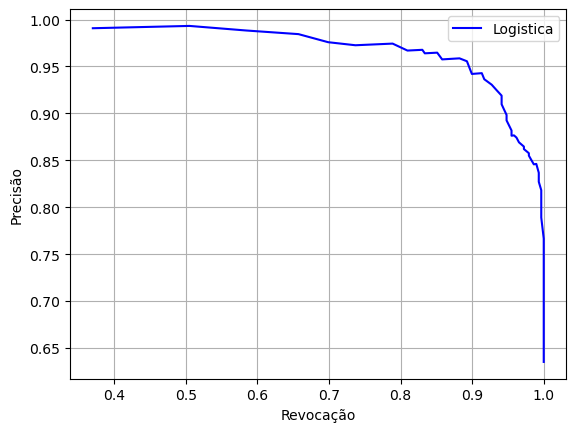

In [24]:
plt.plot(Recall_training, Precision_training, label='Logistica', color='blue')
plt.xlabel('Revocação')
plt.ylabel('Precisão')
plt.legend()
plt.grid()
plt.show()

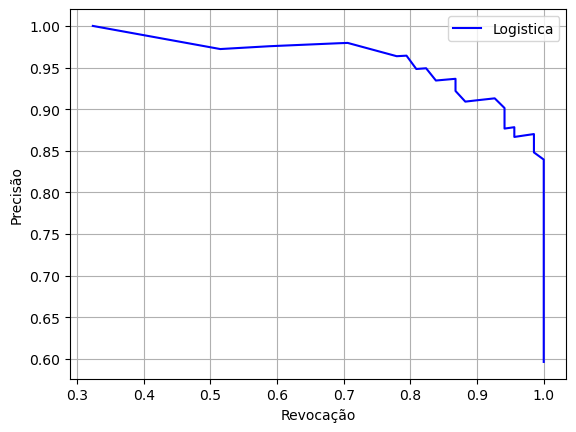

In [25]:
plt.plot(Recall_test, Precision_test, label='Logistica', color='blue')
plt.xlabel('Revocação')
plt.ylabel('Precisão')
plt.legend()
plt.grid()
plt.show()

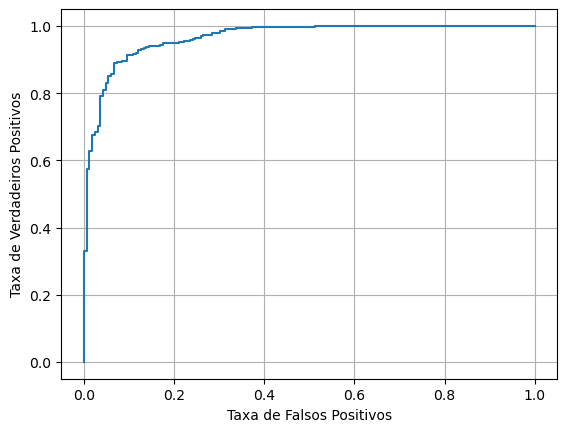

In [26]:
falsePos_training, truePos_training, thresholds_training = roc_curve(yTrain, f_training)

plt.plot(falsePos_training, truePos_training)
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos")
plt.grid()
plt.show()

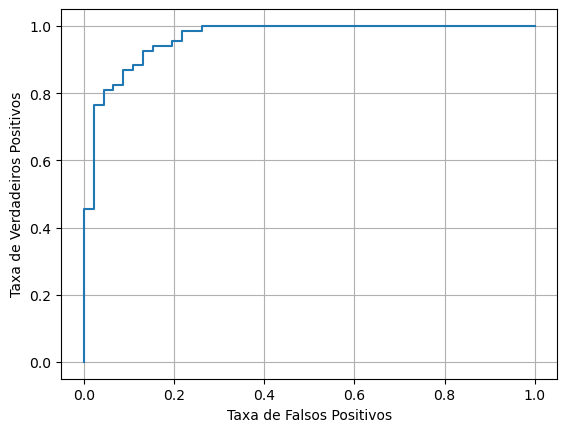

In [27]:
falsePos_test, truePos_test, thresholds_test = roc_curve(yTest, f_test)

plt.plot(falsePos_test, truePos_test)
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos")
plt.grid()
plt.show()

In [70]:
from sklearn.svm import SVC
from matplotlib.colors import LinearSegmentedColormap

/tmp/ipykernel_19893/1718931128.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disp.ax_.scatter(data[y==0]['Raio médio'], data[y==0]['Perímetro médio'], c='red', label='Classe 1', edgecolors='black')
/tmp/ipykernel_19893/1718931128.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disp.ax_.scatter(data[y==1]['Raio médio'], data[y==1]['Perímetro médio'], c='blue', label='Classe 0', edgecolors='black')


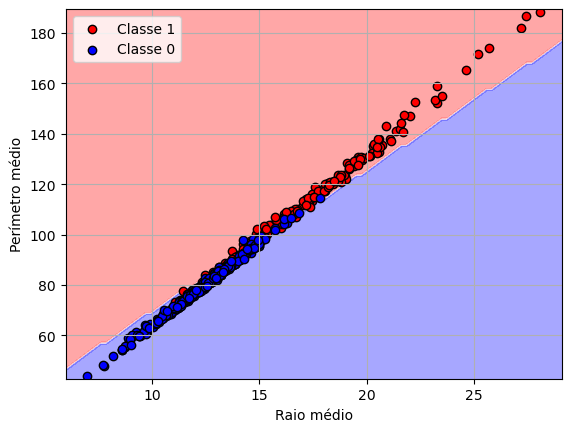

In [156]:
# Kernel Linear
clf = SVC(kernel='linear', C=1)

data = xTrain[['Raio médio', 'Perímetro médio']]
clf.fit(data, yTrain)

cmapColors = plt.cm.bwr(np.linspace(0, 1, 256))
cmapInvertido = LinearSegmentedColormap.from_list('bwr_invertido', cmapColors[::-1])

disp = DecisionBoundaryDisplay.from_estimator(clf, data, response_method='predict', alpha=0.4, cmap=cmapInvertido)
disp.ax_.scatter(data[y==0]['Raio médio'], data[y==0]['Perímetro médio'], c='red', label='Classe 1', edgecolors='black')
disp.ax_.scatter(data[y==1]['Raio médio'], data[y==1]['Perímetro médio'], c='blue', label='Classe 0', edgecolors='black')
disp.ax_.legend()
plt.xlabel("Raio médio")
plt.ylabel("Perímetro médio")
disp.ax_.grid()
plt.show()

/tmp/ipykernel_19893/3902327438.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disp.ax_.scatter(data[y==0]['Raio médio'], data[y==0]['Perímetro médio'], c='red', label='Classe 1', edgecolors='black')
/tmp/ipykernel_19893/3902327438.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disp.ax_.scatter(data[y==1]['Raio médio'], data[y==1]['Perímetro médio'], c='blue', label='Classe 0', edgecolors='black')


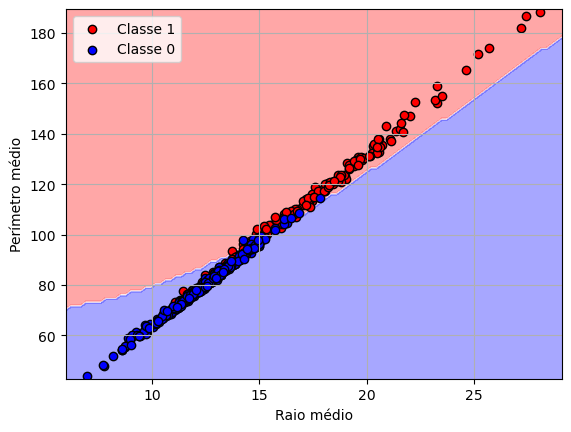

In [149]:
# Kernel Polinomial
clf = SVC(kernel='poly', degree=6, C=1)

data = xTrain[['Raio médio', 'Perímetro médio']]
clf.fit(data, yTrain)

cmapColors = plt.cm.bwr(np.linspace(0, 1, 256))
cmapInvertido = LinearSegmentedColormap.from_list('bwr_invertido', cmapColors[::-1])

disp = DecisionBoundaryDisplay.from_estimator(clf, data, response_method='predict', alpha=0.4, cmap=cmapInvertido)
disp.ax_.scatter(data[y==0]['Raio médio'], data[y==0]['Perímetro médio'], c='red', label='Classe 1', edgecolors='black')
disp.ax_.scatter(data[y==1]['Raio médio'], data[y==1]['Perímetro médio'], c='blue', label='Classe 0', edgecolors='black')
disp.ax_.legend()
plt.xlabel("Raio médio")
plt.ylabel("Perímetro médio")
disp.ax_.grid()
plt.show()

/tmp/ipykernel_19893/2283141415.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disp.ax_.scatter(data[y==0]['Raio médio'], data[y==0]['Perímetro médio'], c='red', label='Classe 1', edgecolors='black')
/tmp/ipykernel_19893/2283141415.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disp.ax_.scatter(data[y==1]['Raio médio'], data[y==1]['Perímetro médio'], c='blue', label='Classe 0', edgecolors='black')


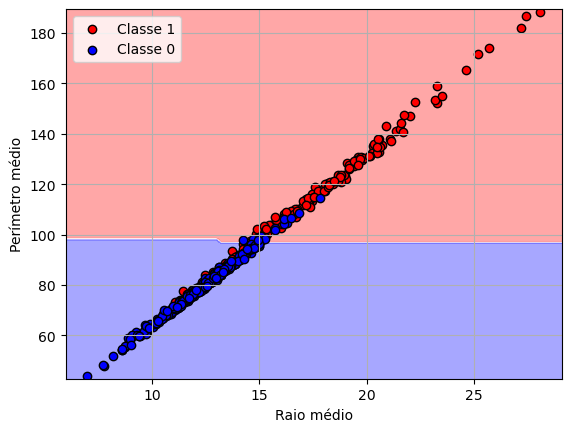

In [151]:
# Kernel normal
clf = SVC(kernel='rbf', C=1)

data = xTrain[['Raio médio', 'Perímetro médio']]
clf.fit(data, yTrain)

cmapColors = plt.cm.bwr(np.linspace(0, 1, 256))
cmapInvertido = LinearSegmentedColormap.from_list('bwr_invertido', cmapColors[::-1])

disp = DecisionBoundaryDisplay.from_estimator(clf, data, response_method='predict', alpha=0.4, cmap=cmapInvertido)
disp.ax_.scatter(data[y==0]['Raio médio'], data[y==0]['Perímetro médio'], c='red', label='Classe 1', edgecolors='black')
disp.ax_.scatter(data[y==1]['Raio médio'], data[y==1]['Perímetro médio'], c='blue', label='Classe 0', edgecolors='black')
disp.ax_.legend()
plt.xlabel("Raio médio")
plt.ylabel("Perímetro médio")
disp.ax_.grid()
plt.show()

/tmp/ipykernel_19893/2882432312.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disp.ax_.scatter(data[y==0]['Raio médio'], data[y==0]['Perímetro médio'], c='red', label='Classe 1', edgecolors='black')
/tmp/ipykernel_19893/2882432312.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disp.ax_.scatter(data[y==1]['Raio médio'], data[y==1]['Perímetro médio'], c='blue', label='Classe 0', edgecolors='black')


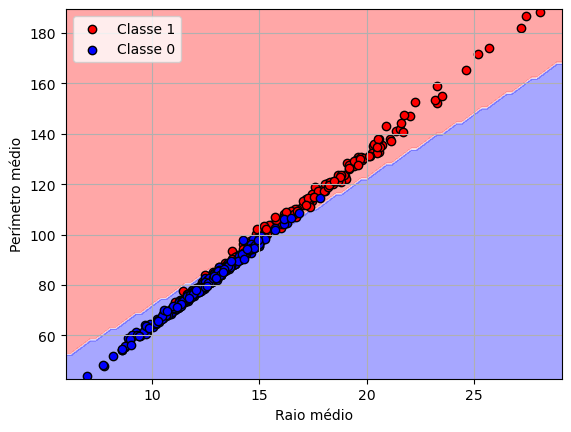

In [161]:
data = xTrain[['Raio médio', 'Perímetro médio']]
logReg.fit(data, yTrain)

cmapColors = plt.cm.bwr(np.linspace(0, 1, 256))
cmapInvertido = LinearSegmentedColormap.from_list('bwr_invertido', cmapColors[::-1])

disp = DecisionBoundaryDisplay.from_estimator(logReg, data, response_method='predict', alpha=0.4, cmap=cmapInvertido)
disp.ax_.scatter(data[y==0]['Raio médio'], data[y==0]['Perímetro médio'], c='red', label='Classe 1', edgecolors='black')
disp.ax_.scatter(data[y==1]['Raio médio'], data[y==1]['Perímetro médio'], c='blue', label='Classe 0', edgecolors='black')
disp.ax_.legend()
plt.xlabel("Raio médio")
plt.ylabel("Perímetro médio")
disp.ax_.grid()
plt.show()

In [77]:
predictValue = logReg.predict(data)
trainingData = accuracy_score(yTrain, predictValue)
trainingData

0.8967032967032967

In [79]:
from sklearn.metrics import ConfusionMatrixDisplay

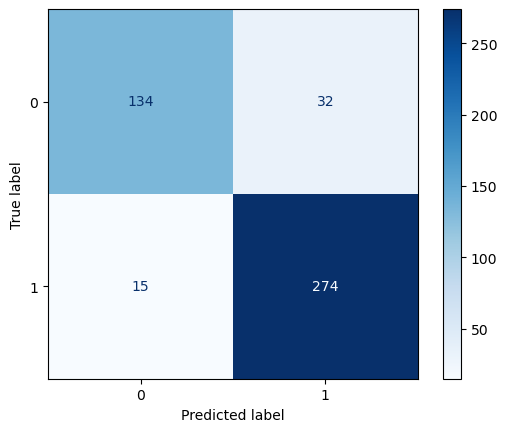

In [162]:
cM=confusion_matrix(yTrain, logReg.predict(data))
disp = ConfusionMatrixDisplay(confusion_matrix=cM, display_labels=logReg.classes_)
disp.plot(cmap='Blues')
plt.show()

In [232]:
Vn_training = (yTrain==0)*(logReg.predict(data)==0)
Fp_training = (yTrain==0)*(logReg.predict(data)==1)
Fn_training = (yTrain==1)*(logReg.predict(data)==0)
Vp_training = (yTrain==1)*(logReg.predict(data)==1)

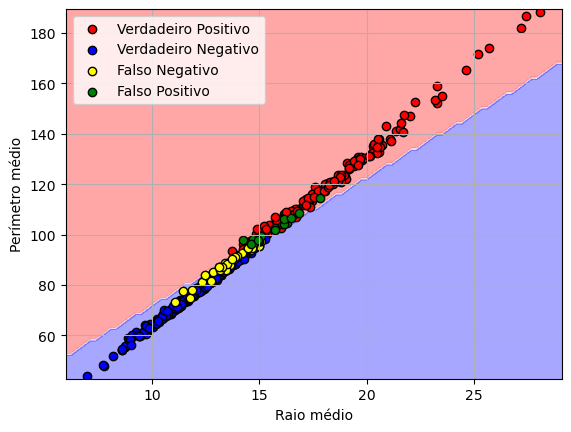

In [241]:
data_training = xTrain[['Raio médio', 'Perímetro médio']]
logReg.fit(data_training, yTrain)

cmapColors = plt.cm.bwr(np.linspace(0, 1, 256))
cmapInvertido = LinearSegmentedColormap.from_list('bwr_invertido', cmapColors[::-1])

disp = DecisionBoundaryDisplay.from_estimator(logReg, data, response_method='predict', alpha=0.4, cmap=cmapInvertido)
disp.ax_.scatter(data_training[yTrain==0]['Raio médio'][Vn_training], data_training[yTrain==0]['Perímetro médio'][Vn_training], c='red', label='Verdadeiro Positivo', edgecolors='black')
disp.ax_.scatter(data_training[yTrain==1]['Raio médio'][Vp_training], data_training[yTrain==1]['Perímetro médio'][Vp_training], c='blue', label='Verdadeiro Negativo', edgecolors='black')
disp.ax_.scatter(data_training[yTrain==0]['Raio médio'][Fp_training], data_training[yTrain==0]['Perímetro médio'][Fp_training], c='yellow', label='Falso Negativo', edgecolors='black')
disp.ax_.scatter(data_training[yTrain==1]['Raio médio'][Fn_training], data_training[yTrain==1]['Perímetro médio'][Fn_training], c='green', label='Falso Positivo', edgecolors='black')
disp.ax_.legend()
plt.xlabel("Raio médio")
plt.ylabel("Perímetro médio")
disp.ax_.grid()
plt.show()

In [244]:
data_test = xTest[['Raio médio', 'Perímetro médio']]
Vn_test = (yTest==0)*(logReg.predict(data_test)==0)
Fp_test = (yTest==0)*(logReg.predict(data_test)==1)
Fn_test = (yTest==1)*(logReg.predict(data_test)==0)
Vp_test = (yTest==1)*(logReg.predict(data_test)==1)

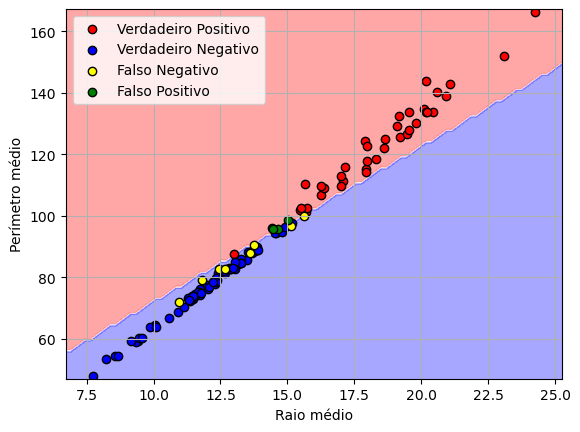

In [246]:
cmapColors = plt.cm.bwr(np.linspace(0, 1, 256))
cmapInvertido = LinearSegmentedColormap.from_list('bwr_invertido', cmapColors[::-1])

disp = DecisionBoundaryDisplay.from_estimator(logReg, data_test, response_method='predict', alpha=0.4, cmap=cmapInvertido)
disp.ax_.scatter(data_test[yTest==0]['Raio médio'][Vn_test], data_test[yTest==0]['Perímetro médio'][Vn_test], c='red', label='Verdadeiro Positivo', edgecolors='black')
disp.ax_.scatter(data_test[yTest==1]['Raio médio'][Vp_test], data_test[yTest==1]['Perímetro médio'][Vp_test], c='blue', label='Verdadeiro Negativo', edgecolors='black')
disp.ax_.scatter(data_test[yTest==0]['Raio médio'][Fp_test], data_test[yTest==0]['Perímetro médio'][Fp_test], c='yellow', label='Falso Negativo', edgecolors='black')
disp.ax_.scatter(data_test[yTest==1]['Raio médio'][Fn_test], data_test[yTest==1]['Perímetro médio'][Fn_test], c='green', label='Falso Positivo', edgecolors='black')
disp.ax_.legend()
plt.xlabel("Raio médio")
plt.ylabel("Perímetro médio")
disp.ax_.grid()
plt.show()

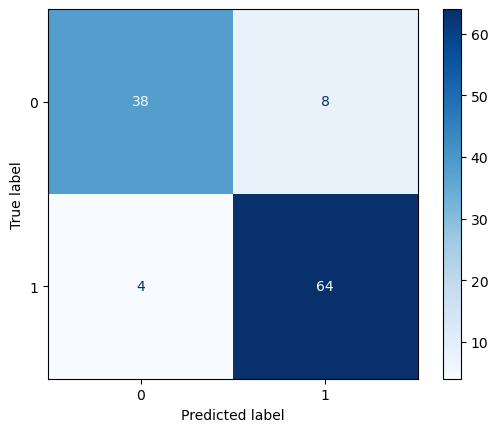

In [247]:
cM_test=confusion_matrix(yTest, logReg.predict(data_test))
disp_test = ConfusionMatrixDisplay(confusion_matrix=cM_test, display_labels=logReg.classes_)
disp_test.plot(cmap='Blues')
plt.show()

In [263]:
meanData = X.iloc[:, :10]
errorData = X.iloc[:, 10:20]
worstData = X.iloc[:, 20:30]